<a href="https://colab.research.google.com/github/heyroha/DL/blob/main/TF/TF1_Basic_of_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TF
**Tensor 생성**
- 우리가 생성하는 것은 tf.Tensor 데이터


📌항상 체크해야 하는 것: **shape, dtype**

## Constants

In [1]:
import tensorflow as tf

In [ ]:
li_ten = tf.constant([1,2,3])
arr_ten = tf.constant([1.,2.,3.])
tu_ten = tf.constant(([1,2,3],[1,2,3]))

In [ ]:
arr_ten.dtype,li_ten.dtype

(tf.float32, tf.int32)

In [ ]:
arr_ten * li_ten
# 아래와 같은 오류 발생

# #---------------------------------------------------------------------------
# InvalidArgumentError                      Traceback (most recent call last)
# <ipython-input-3-a2ff93453cca> in <cell line: 1>()
# ----> 1 arr_ten * li_ten

# 1 frames
# /usr/local/lib/python3.10/dist-packages/tensorflow/python/framework/ops.py in raise_from_not_ok_status(e, name)
#    5981 def raise_from_not_ok_status(e, name) -> NoReturn:
#    5982   e.message += (" name: " + str(name if name is not None else ""))
# -> 5983   raise core._status_to_exception(e) from None  # pylint: disable=protected-access
#    5984
#    5985

# InvalidArgumentError: cannot compute Mul as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:Mul] name:


In [ ]:
li_ten = tf.cast(li_ten, dtype = tf.float32)

In [ ]:
arr_ten * li_ten

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 4., 9.], dtype=float32)>

In [ ]:
tf.ones(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 1., 1.], dtype=float32)>

In [ ]:
tf.zeros(4)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0., 0., 0., 0.], dtype=float32)>

In [ ]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [ ]:
tf.range(1,20,2)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19], dtype=int32)>

In [ ]:
def geometric_sequence(n):
  li = []
  a = 1
  for i in range(n):
    if a == 1:
      li.append(a)
      a *= 2
    else:
      li.append(a)
      a *= 2

  return tf.constant(li)

In [ ]:
geometric_sequence(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)>

In [ ]:
def geometric_sequence1(n):
  r = tf.range(n, dtype = 'int32')
  s = tf.ones(n, dtype = tf.int32) *2
  return s**r


In [ ]:
geometric_sequence1(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([  1,   2,   4,   8,  16,  32,  64, 128, 256, 512], dtype=int32)>

**Random Value**

In [ ]:
shape=(3,3)

In [ ]:
tf.random.normal(shape)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[-1.71168   , -0.7441064 ,  0.64461386],
       [ 0.28025067,  0.82814723, -0.7757118 ],
       [ 0.7532125 ,  0.8952859 ,  1.1221932 ]], dtype=float32)>

In [ ]:
tf.random.uniform(shape)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[0.00450373, 0.63474274, 0.15899432],
       [0.4314134 , 0.6121844 , 0.90460193],
       [0.20126247, 0.4267472 , 0.7211727 ]], dtype=float32)>

**Random Seed 관리하기**
- Random value로 보통 가중치를 초기화
- 이외에도 학습과정에서 random value가 많이 사용됨
- 이를 관리 안 해주면, 자신이 했던 작업이 동일하게 복구 또는 재현이 안됨!!
=> 항상 Random Seed를 고정해두고 개발한다!!

In [ ]:
seed = 7777

In [ ]:
tf.random.set_seed(seed)
a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a,b, sep = '\n')

tf.Tensor([0.959749], shape=(1,), dtype=float32)
tf.Tensor([0.8677443], shape=(1,), dtype=float32)


In [ ]:

a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a,b, sep = '\n')

tf.Tensor([0.22878075], shape=(1,), dtype=float32)
tf.Tensor([0.87772965], shape=(1,), dtype=float32)


In [ ]:
tf.random.set_seed(seed)
a = tf.random.uniform([1])
b = tf.random.uniform([1])
print(a,b, sep = '\n')

tf.Tensor([0.959749], shape=(1,), dtype=float32)
tf.Tensor([0.8677443], shape=(1,), dtype=float32)


## Variable
- 미지수, 가중치를 정의할때 사용
- 공간이라고 생각하고, 그 안에 상수를 채운다고 생각하기
- 변수 정의는 변수 생성 + 초기화

- 여러가지 연산

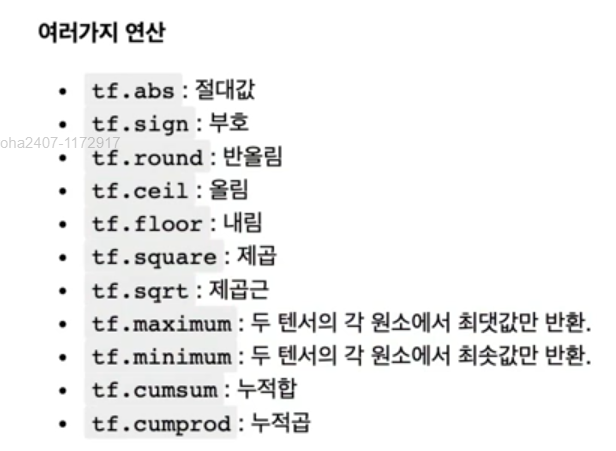

In [ ]:
a = tf.range(6, dtype = tf.int32)
b = 2 * tf.ones(6, dtype = tf.int32)

tf.add(a,b)

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 3, 4, 5, 6, 7], dtype=int32)>

In [ ]:
a+b

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 3, 4, 5, 6, 7], dtype=int32)>

In [ ]:
tf.maximum(a,b)


<tf.Tensor: shape=(6,), dtype=int32, numpy=array([2, 2, 2, 3, 4, 5], dtype=int32)>

In [ ]:
tf.sqrt(tf.cast(a, tf.float32))

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.       , 1.       , 1.4142135, 1.7320508, 2.       , 2.2360678],
      dtype=float32)>

**Axis**

In [ ]:
rank_2 = tf.random.normal((2,3))

In [ ]:
rank_2

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[-0.4163342 ,  0.29580247, -1.6451327 ],
       [ 0.66793525,  1.1097385 ,  0.03885252]], dtype=float32)>

In [ ]:
rank_2[0,2]

<tf.Tensor: shape=(), dtype=float32, numpy=-1.6451327>

In [ ]:
rank_2[0]

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.4163342 ,  0.29580247, -1.6451327 ], dtype=float32)>

In [ ]:
rank_3 = tf.random.normal((3,3,3))

In [ ]:
rank_3

<tf.Tensor: shape=(3, 3, 3), dtype=float32, numpy=
array([[[ 0.39949307, -0.57603157,  1.9408727 ],
        [ 0.44997263, -0.30515158,  0.02044026],
        [ 0.19132732, -1.6136625 ,  2.5957038 ]],

       [[ 1.0797819 , -0.43072778, -0.32124633],
        [-0.49523184,  2.1495926 , -0.7488921 ],
        [-1.078005  ,  1.2441242 ,  0.01186579]],

       [[-0.693731  ,  0.17833573,  0.6546467 ],
        [ 0.4033327 ,  1.0709362 ,  0.20126486],
        [-0.65573823, -0.26609296,  2.0676982 ]]], dtype=float32)>

In [ ]:
rank_3[1,1,2]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.7488921>

In [ ]:
rank_4 = tf.random.normal((3,3,3,3))

In [ ]:
rank_4[1,2,1,2]

<tf.Tensor: shape=(), dtype=float32, numpy=-0.5650622>

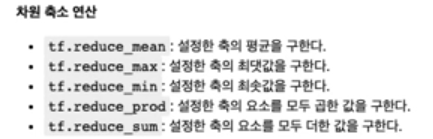

In [ ]:
a

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5], dtype=int32)>

In [ ]:
tf.reduce_sum(a, axis = 0)

<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [ ]:
b = tf.random.normal((2,7))

In [ ]:
b

<tf.Tensor: shape=(2, 7), dtype=float32, numpy=
array([[ 0.18403056,  0.31035087,  1.2850683 ,  0.66293055,  1.1780045 ,
        -1.041737  ,  0.13852893],
       [-2.275557  , -1.3537039 ,  0.2509061 , -0.6544008 , -0.8630133 ,
        -0.04641647, -0.80467814]], dtype=float32)>

In [ ]:
tf.reduce_sum(b,axis = 1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 2.7171767, -5.746864 ], dtype=float32)>

- 행렬과 관련된 연산

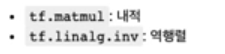

In [ ]:
a = tf.constant([[2,0],[0,1]], dtype = tf.float32)
b = tf.constant([[1,1],[0,1]], dtype = tf.float32)
tf.matmul(a,b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2., 2.],
       [0., 1.]], dtype=float32)>

In [ ]:
tf.linalg.inv(a)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[0.5, 0. ],
       [0. , 1. ]], dtype=float32)>

**크기 및 차원을 바꾸는 명령**

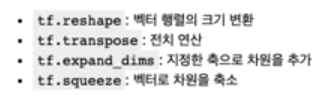

In [14]:
a = tf.range(6,dtype = tf.int32)
print(a)
a_2d = tf.reshape(a,(2,3))
a_2d

tf.Tensor([0 1 2 3 4 5], shape=(6,), dtype=int32)


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]], dtype=int32)>

In [15]:
a_2d_t = tf.transpose(a_2d)
a_2d_t

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 3],
       [1, 4],
       [2, 5]], dtype=int32)>

In [16]:
a_3d = tf.expand_dims(a_2d,0)
a_3d #1,2,3차원의 행렬로 변환

<tf.Tensor: shape=(1, 2, 3), dtype=int32, numpy=
array([[[0, 1, 2],
        [3, 4, 5]]], dtype=int32)>

In [17]:
a_4d = tf.expand_dims(a_3d,3)
a_4d # 4 ckdnjsdml 행렬로 변환(3번째 인덱스에 차원을 추가)

<tf.Tensor: shape=(1, 2, 3, 1), dtype=int32, numpy=
array([[[[0],
         [1],
         [2]],

        [[3],
         [4],
         [5]]]], dtype=int32)>

In [21]:
a_1d = tf.squeeze(a_4d) #4차원의 행렬을 1차원 벡터로 변환
a_1d

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[0, 1, 2],
       [3, 4, 5]], dtype=int32)>

**텐서를 나누거나 두 개 이상의 텐서를 합치는 명령**

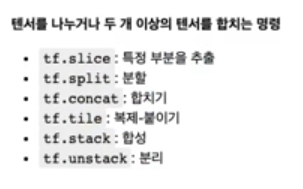


In [23]:
a = tf.reshape(tf.range(12), (3,4))
a

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

In [24]:
tf.slice(a,[0,1],[2,3])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [5, 6, 7]], dtype=int32)>

In [25]:
a1, a2 = tf.split(a, num_or_size_splits=2,axis = 1)
a1,a2

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[0, 1],
        [4, 5],
        [8, 9]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]], dtype=int32)>)

In [26]:
tf.concat([a1,a2], axis = 1)

<tf.Tensor: shape=(3, 4), dtype=int32, numpy=
array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int32)>

In [27]:
tf.concat([a1,a2], axis = 0)

<tf.Tensor: shape=(6, 2), dtype=int32, numpy=
array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [ 2,  3],
       [ 6,  7],
       [10, 11]], dtype=int32)>

In [28]:
a1

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[0, 1],
       [4, 5],
       [8, 9]], dtype=int32)>

In [30]:
tf.tile(a1,[1,3]) #가로축을 따라 3개로 복사-붙이기

<tf.Tensor: shape=(3, 6), dtype=int32, numpy=
array([[0, 1, 0, 1, 0, 1],
       [4, 5, 4, 5, 4, 5],
       [8, 9, 8, 9, 8, 9]], dtype=int32)>

In [31]:
a3 = tf.stack([a1,a2])
a3

<tf.Tensor: shape=(2, 3, 2), dtype=int32, numpy=
array([[[ 0,  1],
        [ 4,  5],
        [ 8,  9]],

       [[ 2,  3],
        [ 6,  7],
        [10, 11]]], dtype=int32)>

In [36]:
tf.unstack(a3, axis = 1)

[<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[0, 1],
        [2, 3]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[4, 5],
        [6, 7]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[ 8,  9],
        [10, 11]], dtype=int32)>]

In [46]:
a = tf.constant(((1,2,3),(1,2,3)))
a

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 2, 3]], dtype=int32)>

In [49]:
b = tf.constant([1,2,3])
b =tf.reshape(b,(3,1))

In [50]:
tf.matmul(a,b)

<tf.Tensor: shape=(2, 1), dtype=int32, numpy=
array([[14],
       [14]], dtype=int32)>